In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Admission_Predict.csv')

In [31]:
def linear_cost(X, y, theta, lam):
    h = X @ theta
    regul = (lam/(2*X.shape[0])) * np.sum(theta**2)
    return ((h - y) ** 2).sum() / (2*len(X)) + regul

def linear_cost_gradient(X, y, theta, lam):
    h = X @ theta
    regul = lam * theta
    return (((h - y).T @ X).T + regul)/ X.shape[0]

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate, threshold,
    max_iter=1000, lam=5
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta, lam)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta, lam)
        costs.append(cost_function(X, y, theta, lam))
        thetas.append(theta.copy())

    return theta, costs, thetas

In [32]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [33]:
df = df.sample(frac=1)

In [34]:
df['const'] = np.ones(len(df))
X = np.array(df.iloc[:,1:8].copy())
y = np.array(df.iloc[:,[8]].copy())
#70%
X_train = X[:280]
#14.75 ish
X_cv = X[281:340]
#14.75 ish
X_test = X[341:400]


#70%
y_train = y[:280]
#14.75 ish
y_cv = y[281:340]
#14.75 ish
y_test = y[341:400]


In [35]:
m, n = X.shape
theta_0 = np.random.rand(n,1)
print(theta_0)

[[0.47633694]
 [0.40719076]
 [0.51300724]
 [0.72470296]
 [0.22550859]
 [0.98620501]
 [0.54297844]]


In [36]:

thetha_5 , costs_5, thetas_5 = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00001, 0.001, 3)
thetha_5

array([[-0.11200645],
       [ 0.20747402],
       [ 0.5070937 ],
       [ 0.71827825],
       [ 0.2189919 ],
       [ 0.97018571],
       [ 0.54190327]])

In [37]:
#Train Cost
print(costs_5[len(costs_5)-1])

2.2735331965175485


Text(0.5, 1.0, 'Costs (train): polynomial degree 1')

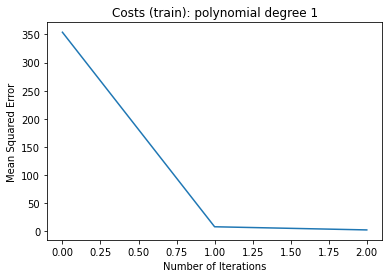

In [38]:
plt.plot(costs_5)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 1')

In [39]:
#Test Cost
print(linear_cost(X_test, y_test, thetha_5, 10), 3)

1.8832461153937792 3


In [40]:
#CV Cost
print(linear_cost(X_cv,y_cv, thetha_5,10),3)

2.5373506868479723 3


# Testing Polynomy of 2nd Degree

In [41]:
thetha_5_2 , costs_5_2, thetas_5_2 = gradient_descent(X_train**2, y_train, theta_0, linear_cost, linear_cost_gradient, 0.000000001, 0.01, 3)
thetha_5_2

array([[71.25119999],
       [ 8.43696063],
       [ 0.51518502],
       [ 0.72741684],
       [ 0.22824883],
       [ 1.02322594],
       [ 0.54231265]])

In [42]:
#Train Cost
print(costs_5_2[len(costs_5_2)-1])

26748500767478.668


Text(0.5, 1.0, 'Costs (train): polynomial degree 2')

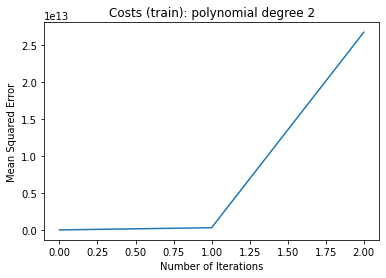

In [43]:
plt.plot(costs_5_2)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 2')

In [44]:
#Test Cost
print(linear_cost(X_test**2, y_test, thetha_5_2, 10), 3)

25879370563675.66 3


In [45]:
#CV Cost
print(linear_cost(X_cv**2,y_cv, thetha_5_2,10),3)

25847186944226.312 3


# Testing Polynomy of 3rd Degree

In [46]:
thetha_5_3 , costs_5_3, thetas_5_3 = gradient_descent(X_train**3, y_train, theta_0, linear_cost, linear_cost_gradient, 0.000000000001, 0.01, 3)
thetha_5_3

array([[-8.20674895e+10],
       [-3.22693644e+09],
       [-1.16775166e+05],
       [-1.32106720e+05],
       [-1.32271839e+05],
       [-1.67568835e+06],
       [-1.49571891e+03]])

In [47]:
print(costs_5_3[len(costs_5_3)-1])

3.5351559972186473e+36


Text(0.5, 1.0, 'Costs (train): polynomial degree 3')

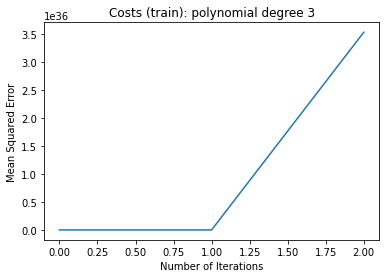

In [48]:
plt.plot(costs_5_3)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 3')

In [49]:
#Test Cost
print(linear_cost(X_test**3, y_test, thetha_5_3, 10), 3)

3.364702422523929e+36 3


In [50]:
#CV Cost
print(linear_cost(X_cv**2,y_cv, thetha_5_3,10),3)

3.367725525831207e+31 3


Trying new lambda on best polinomial result (1st Degree)

In [51]:
thetha_5_5 , costs_5_5, thetas_5_5 = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00001, 0.001, 5)
thetha_5_5

array([[-7.55004466e+09],
       [ 2.20318796e+10],
       [ 7.39447647e+08],
       [ 8.05514451e+08],
       [ 8.19463672e+08],
       [ 2.02396443e+09],
       [ 1.33556365e+08]])

In [52]:
#Train Cost
print(costs_5_5[len(costs_5_5)-1])

3.3319121548914873e+21


Text(0.5, 1.0, 'Costs (train): polynomial degree 1 with lambda 5')

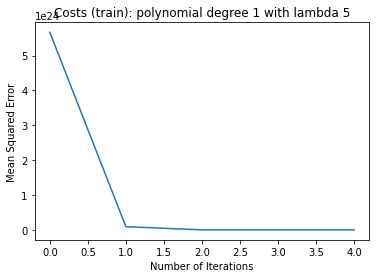

In [53]:
plt.plot(costs_5_5)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 1 with lambda 5')

In [55]:
#Test Cost
print(linear_cost(X_test, y_test, thetha_5_5, 10), 5)

2.589108458772331e+21 5


In [56]:
#CV Cost
print(linear_cost(X_cv,y_cv, thetha_5_5,10),5)

2.937642679691387e+21 5


# Result
Podemos observar que el modelo que mejor se apega es el de grado 1. Intentando cambiar el lambda se puede mejorar el costo, existe un punto donde empeora el costo, intente con 3 y 5 y el mejor resultado podemos verlo en polinomio grado 1 con lambda de 3.


In [57]:
#Preguntar por el cambio radica de los demas polinomios, costos muy altos?